In [34]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input/ecg-arrhythmia-mitbih-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecg-arrhythmia-mitbih-dataset/mitbih_test.csv
/kaggle/input/ecg-arrhythmia-mitbih-dataset/mitbih_train.csv


**Import all libraries**

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
from sklearn.metrics import roc_curve, auc
import csv
import cv2
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import time
import psutil
warnings.filterwarnings('ignore')

**Read the train and test data**

In [36]:
df_train=pd.read_csv('/kaggle/input/ecg-arrhythmia-mitbih-dataset/mitbih_train.csv',header=None)
df_test=pd.read_csv('/kaggle/input/ecg-arrhythmia-mitbih-dataset/mitbih_test.csv',header=None)

**Checking the shape of train and test dataset**

In [37]:
print(df_train.shape)
print(df_test.shape)

(87554, 188)
(21892, 188)


In [38]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [39]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


**Check the frequency of each unique classes in train data**

In [40]:
df_train[187]=df_train[187].astype(int)
equilibre=df_train[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


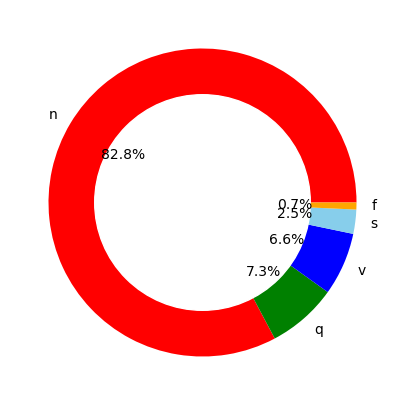

In [41]:
plt.figure(figsize=(10,5))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**The classes are imbalanced. We downsample the '0' class and upsample the other classes**

We used random sampling to sample

In [42]:
from sklearn.utils import resample
df_1=df_train[df_train[187]==1]
df_2=df_train[df_train[187]==2]
df_3=df_train[df_train[187]==3]
df_4=df_train[df_train[187]==4]
df_0=(df_train[df_train[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

df_train=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

**Now we will see that the classes are balanced**

In [43]:
equilibre=df_train[187].value_counts()
print(equilibre)

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


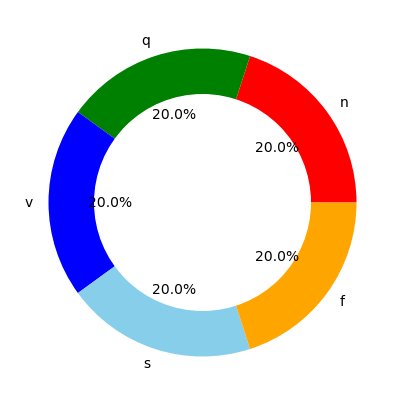

In [44]:
plt.figure(figsize=(10,5))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**Check the frequency of each unique classes in test data**

In [45]:
df_test[187]=df_test[187].astype(int)
equilibre=df_test[187].value_counts()
print(equilibre)

0    18118
4     1608
2     1448
1      556
3      162
Name: 187, dtype: int64


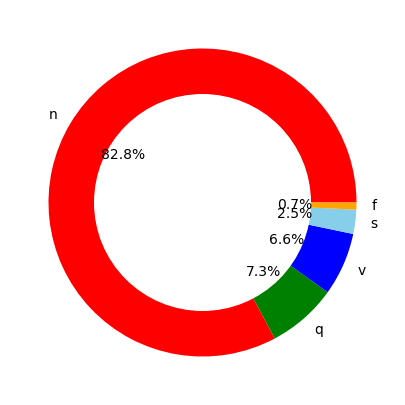

In [46]:
plt.figure(figsize=(10,5))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**The classes in test data are also imbalanced. We downsample the '0' class and upsample the other classes**

We used random sampling to sample

In [47]:
from sklearn.utils import resample
df_1=df_test[df_test[187]==1]
df_2=df_test[df_test[187]==2]
df_3=df_test[df_test[187]==3]
df_4=df_test[df_test[187]==4]
df_0=(df_test[df_test[187]==0]).sample(n=2000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=2000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=2000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=2000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=2000,random_state=126)

df_test=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

**Now we will see that the classes are balanced**

In [48]:
equilibre=df_test[187].value_counts()
print(equilibre)

0    2000
1    2000
2    2000
3    2000
4    2000
Name: 187, dtype: int64


**Now let's check the wave form of each classes**

In [49]:
c=df_train.groupby(187,group_keys=False).apply(lambda df_train : df_train.sample(1))

In [50]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
32765,1.000000,0.745098,0.086275,0.033333,0.115686,0.096078,0.080392,0.078431,0.058824,0.062745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74045,1.000000,0.697970,0.020305,0.000000,0.137056,0.164975,0.162437,0.195431,0.200508,0.215736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
74796,0.016839,0.000000,0.022021,0.132124,0.204663,0.240933,0.305699,0.371762,0.406736,0.509067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80772,1.000000,0.863757,0.587302,0.251323,0.079365,0.117725,0.107143,0.063492,0.060847,0.054233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
82238,0.807933,0.753653,0.685804,0.630480,0.538622,0.448852,0.354906,0.264092,0.160752,0.117954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


**This is a figure of class 0 (Normal Heartbeat)**

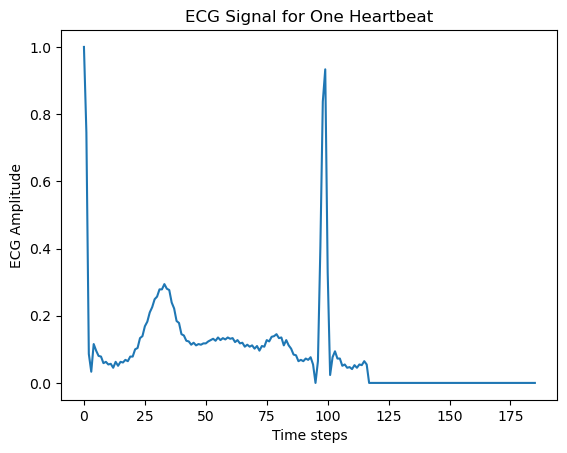

In [51]:
plt.plot(c.iloc[0, :186])  
plt.xlabel('Time steps')  
plt.ylabel('ECG Amplitude')  
plt.title('ECG Signal for One Heartbeat')  
plt.show()


**This is a figure of class 1 (Supraventricular Heartbeat)**

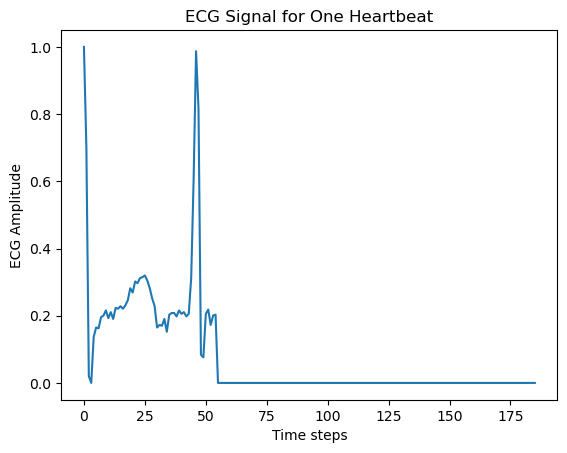

In [52]:
plt.plot(c.iloc[1,:186])
plt.xlabel('Time steps')  
plt.ylabel('ECG Amplitude')  
plt.title('ECG Signal for One Heartbeat')  
plt.show()

**This is a figure of class 2 (Ventricular Heartbeat)**

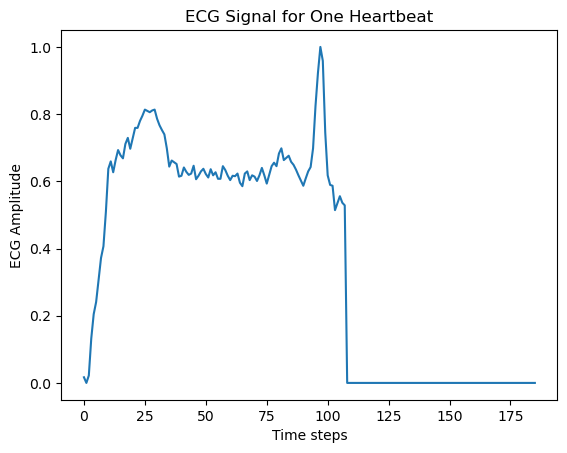

In [53]:
plt.plot(c.iloc[2,:186])
plt.xlabel('Time steps')  
plt.ylabel('ECG Amplitude')  
plt.title('ECG Signal for One Heartbeat')  
plt.show()

**This is a figure of class 3 (Fusion Heartbeat)**

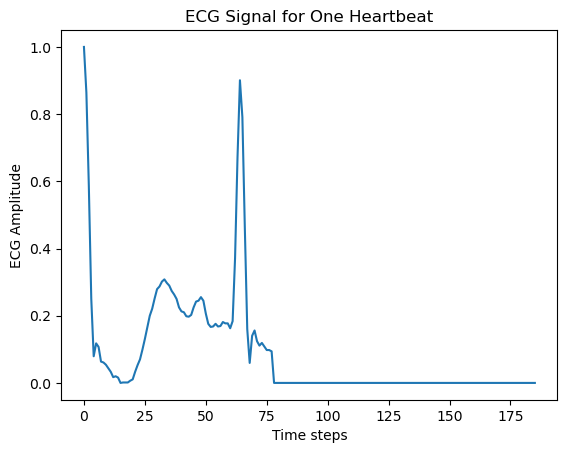

In [54]:
plt.plot(c.iloc[3,:186])
plt.xlabel('Time steps')  
plt.ylabel('ECG Amplitude')  
plt.title('ECG Signal for One Heartbeat')  
plt.show()

**This is a figure of class 4 (Mixed Heartbeat)**

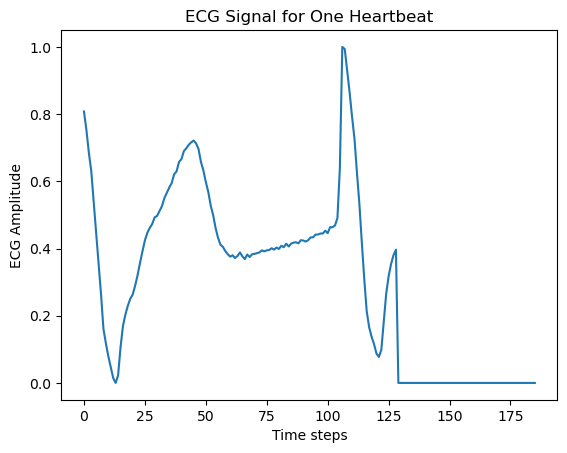

In [55]:
plt.plot(c.iloc[4,:186])
plt.xlabel('Time steps')  
plt.ylabel('ECG Amplitude')  
plt.title('ECG Signal for One Heartbeat')  
plt.show()

In [56]:
target_train=df_train[187]
target_test=df_test[187]

y_train=target_train.values
y_test=target_test.values

y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [57]:
important_cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 21, 22, 23, 24, 25, 26, 33, 34, 35, 36, 37, 38, 44, 46, 47]
df_train = df_train.iloc[:, important_cols]

In [58]:
important_cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 21, 22, 23, 24, 25, 26, 33, 34, 35, 36, 37, 38, 44, 46, 47]
df_test = df_test.iloc[:, important_cols]

In [59]:
X_train=df_train.iloc[:, :-1].values
X_test=df_test.iloc[:,:-1].values
X_train = X_train.reshape(len(X_train), X_train.shape[1])
X_test = X_test.reshape(len(X_test), X_test.shape[1])

In [60]:
import pandas as pd

# Save X_test as a CSV file
X_test_df = pd.DataFrame(X_test)  # Convert the array to a DataFrame
X_test_df.to_csv('X_test.csv', index=False)  # Save as CSV without row indices


Create a csv file to receive all the performance of the model

In [61]:
all_model = pd.DataFrame(columns=['Model', 'Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)', 'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)','Training Time','Testing Time','Memory'])

In [62]:
all_model

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),Training Time,Testing Time,Memory


Now preprocessing is done. We train some ML Models

**Machine Learning Models**

**SVM**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [64]:
# define the SVM model
svm = SVC()

# fit the model on the training data
start_time = time.time()
svm.fit(X_train, y_train)
training_time = time.time() - start_time
memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

In [65]:
import time  
import psutil  
import joblib  # For saving the model  

# Save the trained model  
joblib.dump(svm, "svm_model.pkl")  
print("Model saved as svm_model.pkl")  

# Make predictions on the test data  
start_time = time.time()  
y_pred = svm.predict(X_test)  
testing_time = time.time() - start_time  

# Print performance metrics  
print(f"Training Time: {training_time:.4f} seconds")  
print(f"Testing Time: {testing_time:.4f} seconds")  
print(f"Memory Usage: {memory_usage:.2f} MB")  


Model saved as svm_model.pkl
Training Time: 157.3040 seconds
Testing Time: 25.7337 seconds
Memory Usage: 1270.79 MB


In [66]:
# Load the saved model  
svm_loaded = joblib.load("svm_model.pkl")  

# Make a new prediction  
new_pred = svm_loaded.predict(X_test[:15])  
print("New Predictions:", new_pred)  


New Predictions: [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [67]:
# Load the saved model
svm_loaded = joblib.load("svm_model.pkl")

# Make predictions
y_pred = svm_loaded.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.85      0.80      2000
           1       0.90      0.80      0.85      2000
           2       0.91      0.91      0.91      2000
           3       0.87      0.89      0.88      2000
           4       0.98      0.95      0.96      2000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [68]:
import numpy as np

# Get unique class labels from y_train
unique_labels = np.unique(y_train)

# Print the unique class labels
print(unique_labels)


[0 1 2 3 4]


**Confusion matrix on test data**

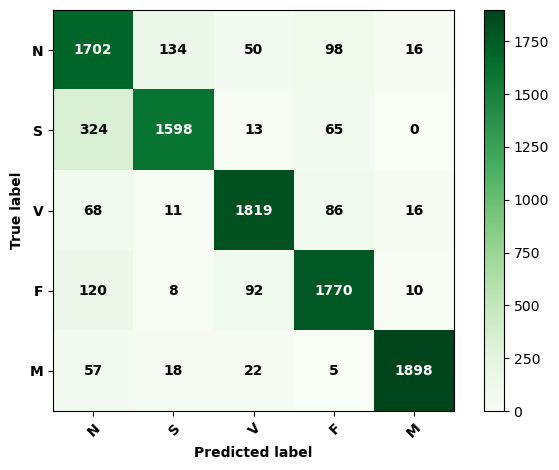

In [69]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

**Performance matrix on test data**

In [70]:
accuracy_test = accuracy_score(y_test, y_pred)*100
precision_test = precision_score(y_test, y_pred, average='macro')*100
recall_test = recall_score(y_test, y_pred, average='macro')*100
f1_test = f1_score(y_test, y_pred, average='macro')*100

print("Accuracy (Test): {:.4f}".format(accuracy_test))
print("Precision (Test): {:.4f}".format(precision_test))
print("Recall (Test): {:.4f}".format(recall_test))
print("F1 score (Test): {:.4f}".format(f1_test))

Accuracy (Test): 87.8700
Precision (Test): 88.3393
Recall (Test): 87.8700
F1 score (Test): 87.9711


In [71]:
# make predictions on the test data
y_pred = svm.predict(X_train)

**Confusion matrix on train data**

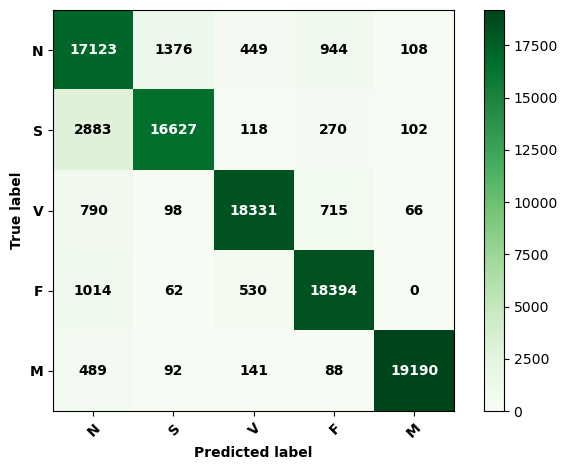

In [72]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

**Performance metrics on train data**

In [73]:
accuracy_train = accuracy_score(y_train, y_pred)*100
precision_train = precision_score(y_train, y_pred, average='macro')*100
recall_train = recall_score(y_train, y_pred, average='macro')*100
f1_train = f1_score(y_train, y_pred, average='macro')*100

print("Accuracy (Train): {:.4f}".format(accuracy_train))
print("Precision (Train): {:.4f}".format(precision_train))
print("Recall (Train): {:.4f}".format(recall_train))
print("F1 score (Train): {:.4f}".format(f1_train))

Accuracy (Train): 89.6650
Precision (Train): 90.0488
Recall (Train): 89.6650
F1 score (Train): 89.7650


In [74]:
y_test = y_test.ravel()  # Converts (10000, 1) → (10000,)


In [75]:
print("y_test shape:", y_test.shape)  # Should be (10000,)
print("y_pred shape:", y_pred.shape)  # Should be (10000,)


y_test shape: (10000,)
y_pred shape: (100000,)


In [76]:
y_test = y_test.astype(int)


In [81]:
y_test = df_test.iloc[:, -1].values  # Extract the last column as labels

In [82]:
y_pred = svm.predict(X_test)


In [83]:
print("y_pred shape:", y_pred.shape)
print("y_test shape:", y_test.shape)


y_pred shape: (10000,)
y_test shape: (10000,)


**save the metrics on a csv file**

In [86]:
with open('svm.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model','Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)','Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)'])
    writer.writerow(['SVM',accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test])
    
result=pd.read_csv('svm.csv')

In [87]:
result

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,SVM,89.665,90.048795,89.665,89.765029,87.87,88.339278,87.87,87.971144


In [88]:
model_name='SVM'
all_model.loc[len(all_model)] = [model_name, accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test, training_time, testing_time, memory_usage]

In [89]:
all_model

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),Training Time,Testing Time,Memory
0,SVM,89.665,90.048795,89.665,89.765029,87.87,88.339278,87.87,87.971144,157.304041,25.733742,1270.792969


**KNN**

In [90]:
from sklearn.neighbors import KNeighborsClassifier

# define the KNN model
knn = KNeighborsClassifier()

# fit the model on the training data
start_time = time.time()
knn.fit(X_train, y_train)
training_time = time.time() - start_time
memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

In [ ]:
# make predictions on the test data
start_time = time.time()
y_pred = knn.predict(X_test)
testing_time = time.time() - start_time

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)*100
precision_test = precision_score(y_test, y_pred, average='macro')*100
recall_test = recall_score(y_test, y_pred, average='macro')*100
f1_test = f1_score(y_test, y_pred, average='macro')*100

print("Accuracy (Test): {:.4f}".format(accuracy_test))
print("Precision (Test): {:.4f}".format(precision_test))
print("Recall (Test): {:.4f}".format(recall_test))
print("F1 score (Test): {:.4f}".format(f1_test))

In [ ]:
# make predictions on the test data
y_pred = knn.predict(X_train)

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred)*100
precision_train = precision_score(y_train, y_pred, average='macro')*100
recall_train = recall_score(y_train, y_pred, average='macro')*100
f1_train = f1_score(y_train, y_pred, average='macro')*100

print("Accuracy (Train): {:.4f}".format(accuracy_train))
print("Precision (Train): {:.4f}".format(precision_train))
print("Recall (Train): {:.4f}".format(recall_train))
print("F1 score (Train): {:.4f}".format(f1_train))

In [ ]:
with open('knn.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model','Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)','Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)'])
    writer.writerow(['KNN',accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test])
    
result=pd.read_csv('knn.csv')

In [ ]:
result

In [ ]:
model_name='KNN'
all_model.loc[len(all_model)] = [model_name, accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test, training_time, testing_time, memory_usage]

In [ ]:
all_model

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# define the LR model
lr = LogisticRegression(solver='liblinear')

# fit the model on the training data
start_time = time.time()
lr.fit(X_train, y_train)
training_time = time.time() - start_time
memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

In [ ]:
# make predictions on the test data
start_time = time.time()
y_pred = lr.predict(X_test)
testing_time = time.time() - start_time

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)*100
precision_test = precision_score(y_test, y_pred, average='macro')*100
recall_test = recall_score(y_test, y_pred, average='macro')*100
f1_test = f1_score(y_test, y_pred, average='macro')*100

print("Accuracy (Test): {:.4f}".format(accuracy_test))
print("Precision (Test): {:.4f}".format(precision_test))
print("Recall (Test): {:.4f}".format(recall_test))
print("F1 score (Test): {:.4f}".format(f1_test))

In [ ]:
# make predictions on the train data
y_pred = lr.predict(X_train)

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred)*100
precision_train = precision_score(y_train, y_pred, average='macro')*100
recall_train = recall_score(y_train, y_pred, average='macro')*100
f1_train = f1_score(y_train, y_pred, average='macro')*100

print("Accuracy (Train): {:.4f}".format(accuracy_train))
print("Precision (Train): {:.4f}".format(precision_train))
print("Recall (Train): {:.4f}".format(recall_train))
print("F1 score (Train): {:.4f}".format(f1_train))

In [ ]:
with open('lr.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model','Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)','Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)'])
    writer.writerow(['Logistic Regression',accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test])

result=pd.read_csv('lr.csv')

In [ ]:
result

In [ ]:
model_name='Logistic Regression'
all_model.loc[len(all_model)] = [model_name, accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test, training_time, testing_time, memory_usage]

In [ ]:
all_model

**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# define the GNB model
gnb = GaussianNB()

# fit the model on the training data
start_time = time.time()
gnb.fit(X_train, y_train)
training_time = time.time() - start_time
memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

In [ ]:
# make predictions on the test data
start_time = time.time()
y_pred = gnb.predict(X_test)
testing_time = time.time() - start_time

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)*100
precision_test = precision_score(y_test, y_pred, average='macro')*100
recall_test = recall_score(y_test, y_pred, average='macro')*100
f1_test = f1_score(y_test, y_pred, average='macro')*100

print("Accuracy (Test): {:.4f}".format(accuracy_test))
print("Precision (Test): {:.4f}".format(precision_test))
print("Recall (Test): {:.4f}".format(recall_test))
print("F1 score (Test): {:.4f}".format(f1_test))

In [ ]:
# make predictions on the train data
y_pred = gnb.predict(X_train)

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred)*100
precision_train = precision_score(y_train, y_pred, average='macro')*100
recall_train = recall_score(y_train, y_pred, average='macro')*100
f1_train = f1_score(y_train, y_pred, average='macro')*100

print("Accuracy (Train): {:.4f}".format(accuracy_train))
print("Precision (Train): {:.4f}".format(precision_train))
print("Recall (Train): {:.4f}".format(recall_train))
print("F1 score (Train): {:.4f}".format(f1_train))

In [ ]:
with open('gnb.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model','Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)','Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)'])
    writer.writerow(['Gaussian Naive Bayes',accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test])
    
result=pd.read_csv('gnb.csv')

In [ ]:
result

In [ ]:
model_name='Gaussian Naive Bayes'
all_model.loc[len(all_model)] = [model_name, accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test, training_time, testing_time, memory_usage]

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# define the DT model
dt = DecisionTreeClassifier()

# fit the model on the training data
start_time = time.time()
dt.fit(X_train, y_train)
training_time = time.time() - start_time
memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

In [ ]:
# make predictions on the test data
start_time = time.time()
y_pred = dt.predict(X_test)
testing_time = time.time() - start_time

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)*100
precision_test = precision_score(y_test, y_pred, average='macro')*100
recall_test = recall_score(y_test, y_pred, average='macro')*100
f1_test = f1_score(y_test, y_pred, average='macro')*100

print("Accuracy (Test): {:.4f}".format(accuracy_test))
print("Precision (Test): {:.4f}".format(precision_test))
print("Recall (Test): {:.4f}".format(recall_test))
print("F1 score (Test): {:.4f}".format(f1_test))

In [ ]:
# make predictions on the train data
y_pred = dt.predict(X_train)

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred)*100
precision_train = precision_score(y_train, y_pred, average='macro')*100
recall_train = recall_score(y_train, y_pred, average='macro')*100
f1_train = f1_score(y_train, y_pred, average='macro')*100

print("Accuracy (Train): {:.4f}".format(accuracy_train))
print("Precision (Train): {:.4f}".format(precision_train))
print("Recall (Train): {:.4f}".format(recall_train))
print("F1 score (Train): {:.4f}".format(f1_train))

In [ ]:
with open('dt.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model','Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)','Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)'])
    writer.writerow(['Decision Tree',accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test])
    
result=pd.read_csv('dt.csv')

In [ ]:
result

In [ ]:
model_name='Decision Tree'
all_model.loc[len(all_model)] = [model_name, accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test, training_time, testing_time, memory_usage]

In [ ]:
all_model

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define the RF model
rf = RandomForestClassifier()

# fit the model on the training data
start_time = time.time()
rf.fit(X_train, y_train)
training_time = time.time() - start_time
memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

In [ ]:
# make predictions on the test data
start_time = time.time()
y_pred = rf.predict(X_test)
testing_time = time.time() - start_time

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)*100
precision_test = precision_score(y_test, y_pred, average='macro')*100
recall_test = recall_score(y_test, y_pred, average='macro')*100
f1_test = f1_score(y_test, y_pred, average='macro')*100

print("Accuracy (Test): {:.4f}".format(accuracy_test))
print("Precision (Test): {:.4f}".format(precision_test))
print("Recall (Test): {:.4f}".format(recall_test))
print("F1 score (Test): {:.4f}".format(f1_test))

In [ ]:
# make predictions on the train data
y_pred = rf.predict(X_train)

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred)*100
precision_train = precision_score(y_train, y_pred, average='macro')*100
recall_train = recall_score(y_train, y_pred, average='macro')*100
f1_train = f1_score(y_train, y_pred, average='macro')*100

print("Accuracy (Train): {:.4f}".format(accuracy_train))
print("Precision (Train): {:.4f}".format(precision_train))
print("Recall (Train): {:.4f}".format(recall_train))
print("F1 score (Train): {:.4f}".format(f1_train))

In [ ]:
with open('rf.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model','Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)','Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)'])
    writer.writerow(['Random Forest',accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test])
    
result=pd.read_csv('rf.csv')

In [ ]:
result

In [ ]:
model_name='Random Forest'
all_model.loc[len(all_model)] = [model_name, accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test, training_time, testing_time, memory_usage]

**Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# define the AB model
ab = AdaBoostClassifier()

# fit the model on the training data
start_time = time.time()
ab.fit(X_train, y_train)
training_time = time.time() - start_time
memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

In [ ]:
# make predictions on the test data
start_time = time.time()
y_pred = ab.predict(X_test)
testing_time = time.time() - start_time

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)*100
precision_test = precision_score(y_test, y_pred, average='macro')*100
recall_test = recall_score(y_test, y_pred, average='macro')*100
f1_test = f1_score(y_test, y_pred, average='macro')*100

print("Accuracy (Test): {:.4f}".format(accuracy_test))
print("Precision (Test): {:.4f}".format(precision_test))
print("Recall (Test): {:.4f}".format(recall_test))
print("F1 score (Test): {:.4f}".format(f1_test))

In [ ]:
# make predictions on the train data
y_pred = ab.predict(X_train)

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred)*100
precision_train = precision_score(y_train, y_pred, average='macro')*100
recall_train = recall_score(y_train, y_pred, average='macro')*100
f1_train = f1_score(y_train, y_pred, average='macro')*100

print("Accuracy (Train): {:.4f}".format(accuracy_train))
print("Precision (Train): {:.4f}".format(precision_train))
print("Recall (Train): {:.4f}".format(recall_train))
print("F1 score (Train): {:.4f}".format(f1_train))

In [ ]:
with open('ab.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model','Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)','Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)'])
    writer.writerow(['Adaboost',accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test])
    
result=pd.read_csv('ab.csv')

In [ ]:
result

In [ ]:
model_name='Adaboost'
all_model.loc[len(all_model)] = [model_name, accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test, training_time, testing_time, memory_usage]

In [ ]:
all_model

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# define the GB model
gb = GradientBoostingClassifier()

# fit the model on the training data
start_time = time.time()
gb.fit(X_train, y_train)
training_time = time.time() - start_time
memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

In [ ]:
# make predictions on the test data
start_time = time.time()
y_pred = gb.predict(X_test)
testing_time = time.time() - start_time

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)*100
precision_test = precision_score(y_test, y_pred, average='macro')*100
recall_test = recall_score(y_test, y_pred, average='macro')*100
f1_test = f1_score(y_test, y_pred, average='macro')*100

print("Accuracy (Test): {:.4f}".format(accuracy_test))
print("Precision (Test): {:.4f}".format(precision_test))
print("Recall (Test): {:.4f}".format(recall_test))
print("F1 score (Test): {:.4f}".format(f1_test))

In [ ]:
# make predictions on the train data
y_pred = gb.predict(X_train)

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred)*100
precision_train = precision_score(y_train, y_pred, average='macro')*100
recall_train = recall_score(y_train, y_pred, average='macro')*100
f1_train = f1_score(y_train, y_pred, average='macro')*100

print("Accuracy (Train): {:.4f}".format(accuracy_train))
print("Precision (Train): {:.4f}".format(precision_train))
print("Recall (Train): {:.4f}".format(recall_train))
print("F1 score (Train): {:.4f}".format(f1_train))

In [ ]:
with open('gb.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model','Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)','Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)'])
    writer.writerow(['Gradient Boosting',accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test])
    
result=pd.read_csv('gb.csv')

In [ ]:
result

In [ ]:
model_name='Gradient Boosting'
all_model.loc[len(all_model)] = [model_name, accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test, training_time, testing_time, memory_usage]

In [ ]:
all_model

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

# define the XGB model
xgb = XGBClassifier()

# fit the model on the training data
start_time = time.time()
xgb.fit(X_train, y_train)
training_time = time.time() - start_time
memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

In [ ]:
# make predictions on the test data
start_time = time.time()
y_pred = xgb.predict(X_test)
testing_time = time.time() - start_time

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)*100
precision_test = precision_score(y_test, y_pred, average='macro')*100
recall_test = recall_score(y_test, y_pred, average='macro')*100
f1_test = f1_score(y_test, y_pred, average='macro')*100

print("Accuracy (Test): {:.4f}".format(accuracy_test))
print("Precision (Test): {:.4f}".format(precision_test))
print("Recall (Test): {:.4f}".format(recall_test))
print("F1 score (Test): {:.4f}".format(f1_test))

In [ ]:
# make predictions on the train data
y_pred = xgb.predict(X_train)

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred)*100
precision_train = precision_score(y_train, y_pred, average='macro')*100
recall_train = recall_score(y_train, y_pred, average='macro')*100
f1_train = f1_score(y_train, y_pred, average='macro')*100

print("Accuracy (Train): {:.4f}".format(accuracy_train))
print("Precision (Train): {:.4f}".format(precision_train))
print("Recall (Train): {:.4f}".format(recall_train))
print("F1 score (Train): {:.4f}".format(f1_train))

In [ ]:
with open('xgb.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model','Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)','Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)'])
    writer.writerow(['XGBoost',accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test])
    
result=pd.read_csv('xgb.csv')

In [ ]:
result

In [ ]:
model_name='XGBoost'
all_model.loc[len(all_model)] = [model_name, accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test, training_time, testing_time, memory_usage]

In [ ]:
all_model

**Catboost**

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

# define the CB model
cb = CatBoostClassifier()

# fit the model on the training data
start_time = time.time()
cb.fit(X_train, y_train)
training_time = time.time() - start_time
memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

In [ ]:
# make predictions on the test data
start_time = time.time()
y_pred = cb.predict(X_test)
testing_time = time.time() - start_time

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)*100
precision_test = precision_score(y_test, y_pred, average='macro')*100
recall_test = recall_score(y_test, y_pred, average='macro')*100
f1_test = f1_score(y_test, y_pred, average='macro')*100

print("Accuracy (Test): {:.4f}".format(accuracy_test))
print("Precision (Test): {:.4f}".format(precision_test))
print("Recall (Test): {:.4f}".format(recall_test))
print("F1 score (Test): {:.4f}".format(f1_test))

In [ ]:
# make predictions on the train data
y_pred = cb.predict(X_train)

In [ ]:
classes=['N', 'S', 'V', 'F', 'M']
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       aspect='equal',
       )
plt.xticks(np.arange(cm.shape[1]),  rotation=45, fontweight='bold', color='black',fontsize=10)
plt.yticks(np.arange(cm.shape[0]),  fontweight='bold', color='black',fontsize=10)
plt.ylabel('True label', fontweight='bold', color='black',fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', color='black',fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", fontweight='bold',
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred)*100
precision_train = precision_score(y_train, y_pred, average='macro')*100
recall_train = recall_score(y_train, y_pred, average='macro')*100
f1_train = f1_score(y_train, y_pred, average='macro')*100

print("Accuracy (Train): {:.4f}".format(accuracy_train))
print("Precision (Train): {:.4f}".format(precision_train))
print("Recall (Train): {:.4f}".format(recall_train))
print("F1 score (Train): {:.4f}".format(f1_train))

In [ ]:
with open('cb.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model','Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)','Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)'])
    writer.writerow(['CatBoost',accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test])
    
result=pd.read_csv('cb.csv')

In [ ]:
result

In [ ]:
model_name='Catboost'
all_model.loc[len(all_model)] = [model_name, accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test, training_time, testing_time, memory_usage]

In [ ]:
all_model